In [1]:
%matplotlib inline
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from pandas.plotting import scatter_matrix 
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import cohen_kappa_score
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('V4_classification_lr3.csv', index_col=0)

print(df.dtypes)
df.head()
# df.dtypes

Aspect                                float64
Slope                                 float64
Horizontal_Distance_To_Hydrology      float64
Vertical_Distance_To_Hydrology        float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
Wilderness_Area_0                     float64
Wilderness_Area_1                     float64
Wilderness_Area_2                     float64
Wilderness_Area_3                     float64
Soil_Type_0                           float64
Soil_Type_1                           float64
Soil_Type_2                           float64
Soil_Type_3                           float64
Soil_Type_4                           float64
Soil_Type_5                           float64
Soil_Type_6                           float64
Soil_Type_7                           float64
Soil_Type_8                       

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
Elevation,,,,,,,,,,,,,,,,,,,,,
2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [8]:
df['Cover_Type'].value_counts()

Cover_Type
2    254165
1    178709
3     28058
7     17532
6     14851
5      9292
4      2747
Name: count, dtype: int64

In [3]:
print (df.shape)
df.info()

(505354, 54)
<class 'pandas.core.frame.DataFrame'>
Index: 505354 entries, 2596.0 to 3134.0
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Aspect                              505354 non-null  float64
 1   Slope                               505354 non-null  float64
 2   Horizontal_Distance_To_Hydrology    505354 non-null  float64
 3   Vertical_Distance_To_Hydrology      505354 non-null  float64
 4   Horizontal_Distance_To_Roadways     505354 non-null  float64
 5   Hillshade_9am                       505354 non-null  float64
 6   Hillshade_Noon                      505354 non-null  float64
 7   Hillshade_3pm                       505354 non-null  float64
 8   Horizontal_Distance_To_Fire_Points  505354 non-null  float64
 9   Wilderness_Area_0                   505354 non-null  float64
 10  Wilderness_Area_1                   505354 non-null  float64
 11  Wilderness_Ar

Выполним анализ корреляционной зависимости для целевого признака (Cover_Type)

In [4]:
corr = df.corr()
# plt.figure(figsize=(10,10))
# plt.title("Корреляция")
# sns.heatmap(corr, vmax=1, square=True, annot = True, cmap='cubehelix')
# plt.show()
corr["Cover_Type"].sort_values(ascending=False)
print(corr["Cover_Type"])

Aspect                                0.034976
Slope                                 0.163752
Horizontal_Distance_To_Hydrology     -0.004113
Vertical_Distance_To_Hydrology        0.102207
Horizontal_Distance_To_Roadways      -0.153851
Hillshade_9am                        -0.054679
Hillshade_Noon                       -0.105208
Hillshade_3pm                        -0.038649
Horizontal_Distance_To_Fire_Points   -0.093987
Wilderness_Area_0                    -0.240075
Wilderness_Area_1                    -0.048874
Wilderness_Area_2                     0.072574
Wilderness_Area_3                     0.348599
Soil_Type_0                           0.097510
Soil_Type_1                           0.121361
Soil_Type_2                           0.073132
Soil_Type_3                           0.085740
Soil_Type_4                           0.083659
Soil_Type_5                           0.121226
Soil_Type_6                          -0.000611
Soil_Type_7                          -0.004053
Soil_Type_8  

In [5]:
# df = df.drop(['Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_33'], axis=1)

Построим гистограммы распределения и плотнотей и зависимостей признаков

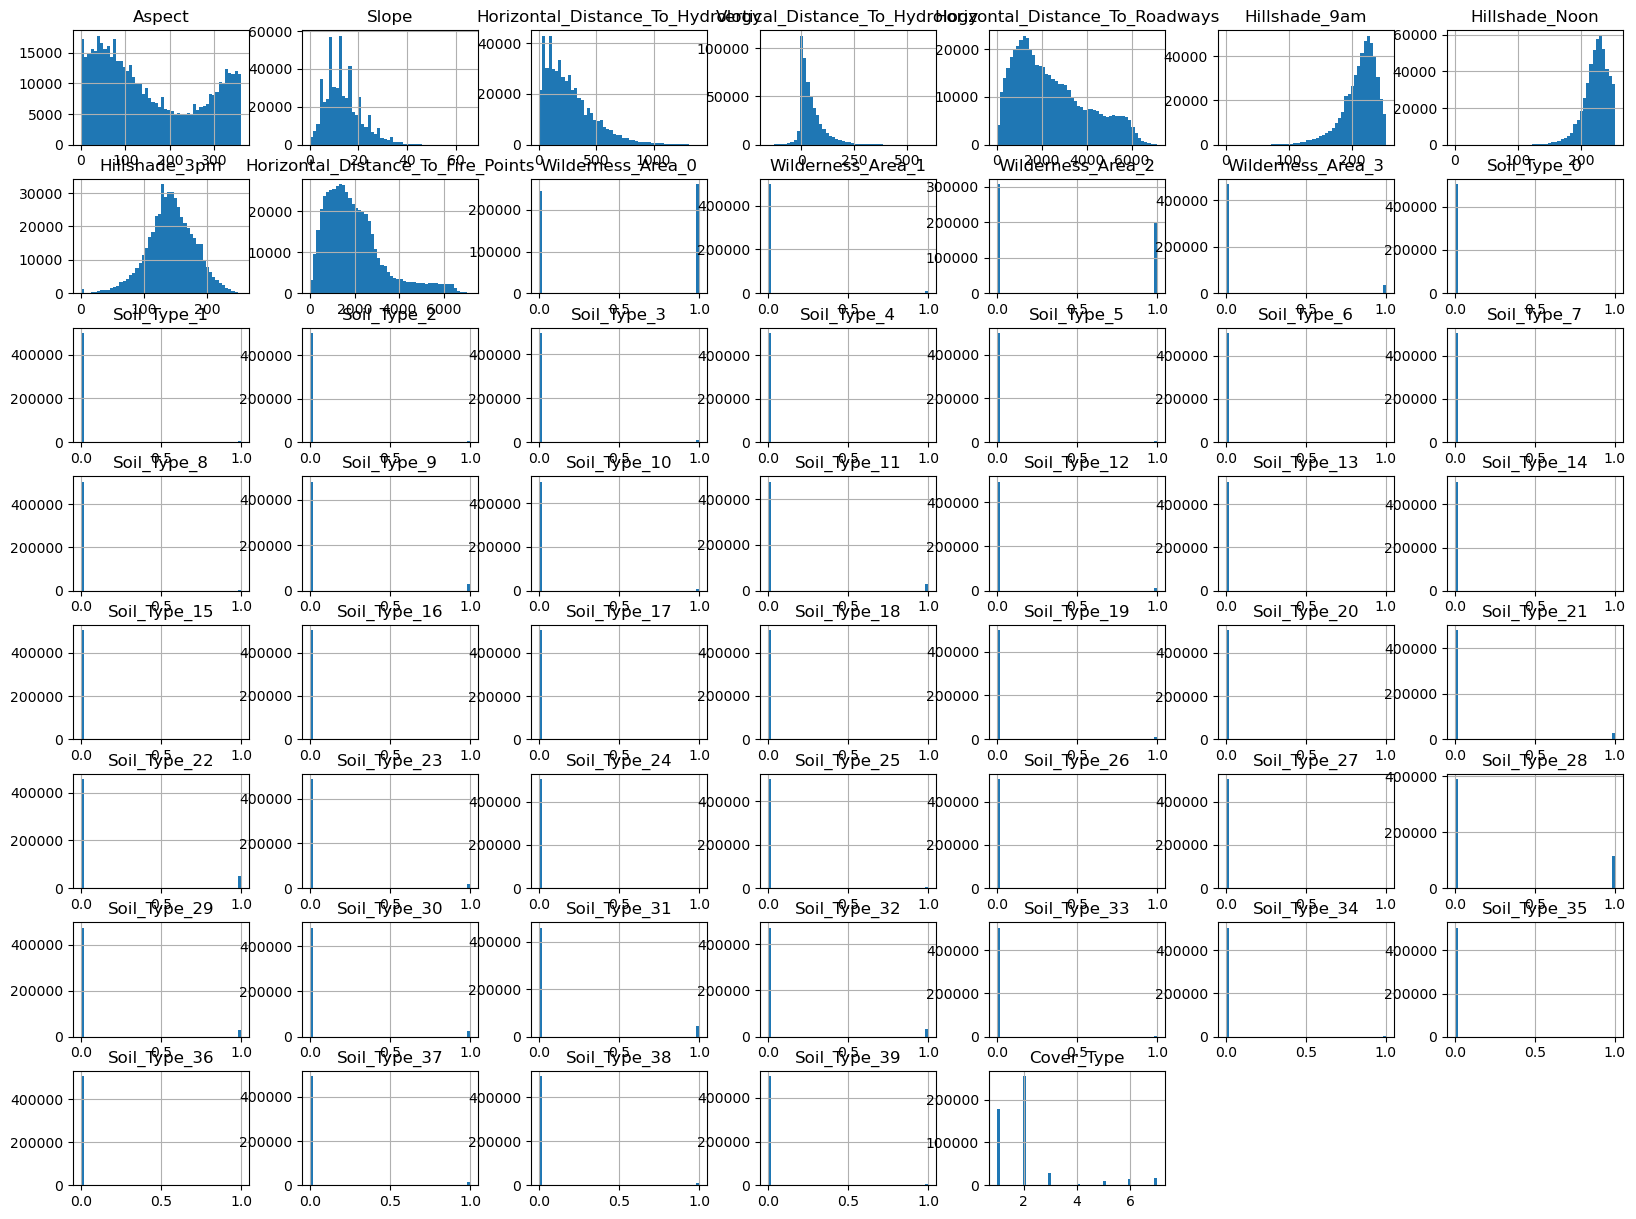

In [6]:
df.hist(bins=50,figsize=(20,15))
plt.show()

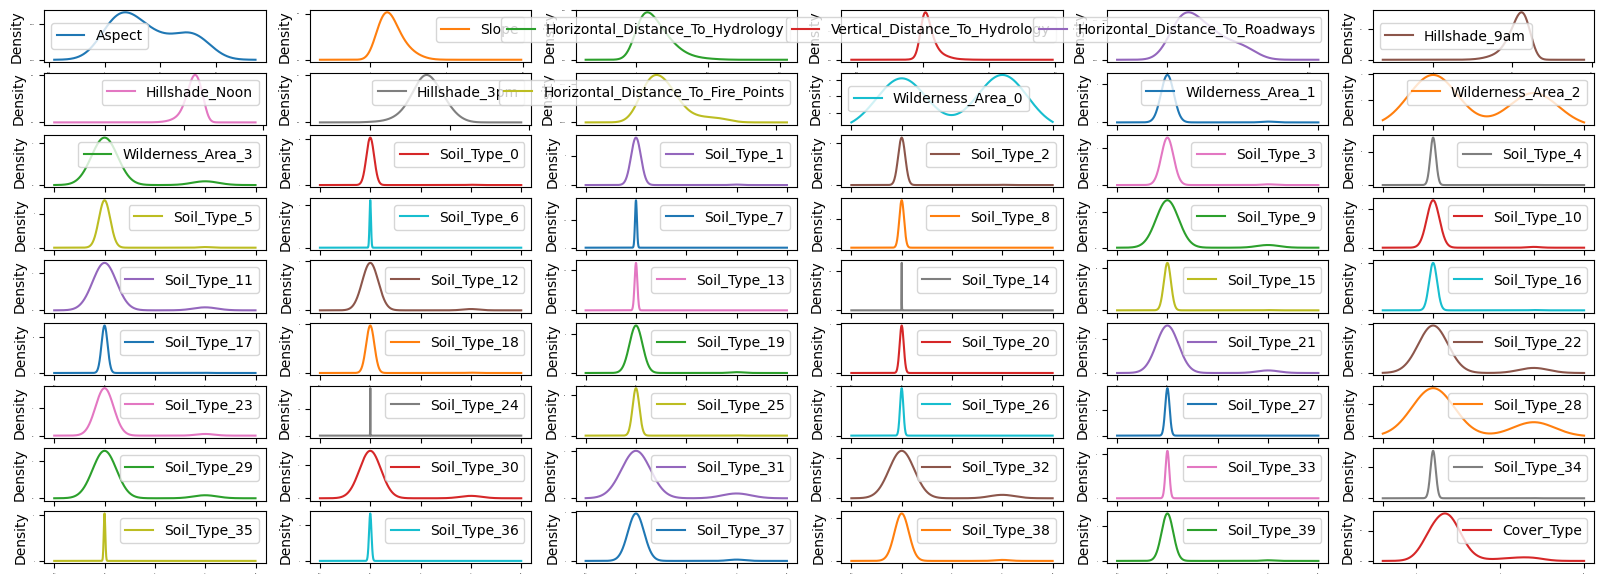

In [7]:
df.plot(kind='density', subplots=True, layout=(10,6), sharex=False, legend=True, fontsize=1, figsize=(20,8), bw_method=0.5)
plt.show()

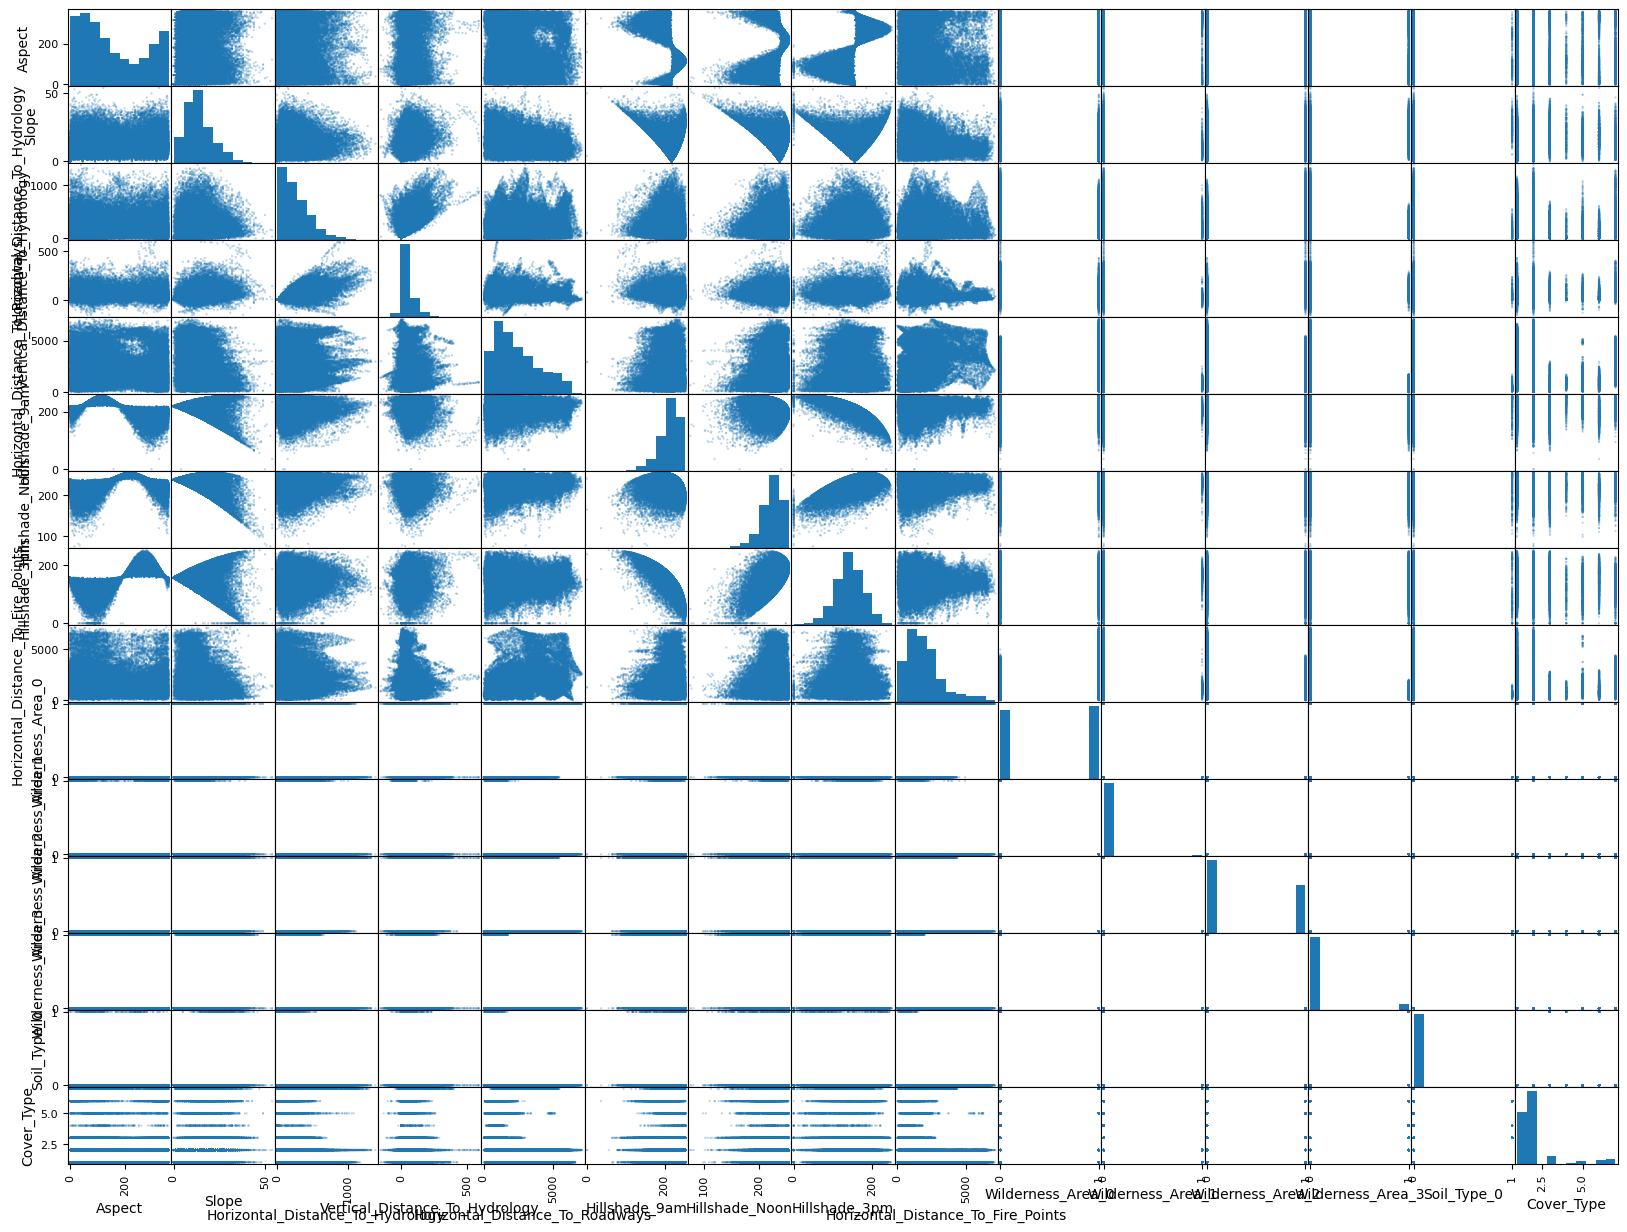

In [5]:
df_without_classes = df.drop(['Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39'], axis=1)
scatter_matrix(df_without_classes.sample(frac=0.1, random_state=42), figsize=(20, 15), diagonal='hist', alpha=0.3, s=10)
plt.show()

Как можно заметить, самые несущественные признаки - тип почвы в некоторых столбцах. Поскольку этот признак является важным, и представляет собой категориальный признак, мы не можем от него избавиться.

Разделим данные на входные и выходные значения

In [9]:
X = df.drop(['Cover_Type'], axis=1)
Y = df['Cover_Type']

X

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
Elevation,,,,,,,,,,,,,,,,,,,,,
2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158.0,61.0,13.0,60.0,13.0,1590.0,230.0,211.0,111.0,1706.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3151.0,68.0,13.0,30.0,6.0,1590.0,233.0,214.0,111.0,1731.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3145.0,56.0,13.0,0.0,0.0,1591.0,228.0,213.0,116.0,1756.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Создадим набор с дополнительным признаком, представляющим собой дистанцию до гидрологии, вычесленную с помощью Теоремы Пифагора

In [10]:
X_extra = X
Y_extra = Y
X_extra["Distance"] = np.sqrt(X_extra["Horizontal_Distance_To_Hydrology"]**2 * X_extra["Vertical_Distance_To_Hydrology"]**2)

X_with_new_atribbute = df.drop(['Cover_Type'], axis=1)
Y_with_new_atribbute = df['Cover_Type']

Используем нормализаю для обоих наборов данных. 

In [11]:
scaler = Normalizer()
X_scaled = scaler.fit_transform(X)
Y = np.array(to_categorical(Y-1))
Y = Y.reshape(-1, Y.shape[1])
# scaler_y = Normalizer().fit(Y)
Y_scaled = Y


scaler_extra = Normalizer().fit(X_with_new_atribbute)
X_with_new_atribbute_scaled = scaler_extra.fit_transform(X_with_new_atribbute)
Y_with_new_atribbute = np.array(to_categorical(Y_with_new_atribbute-1))
Y_with_new_atribbute = Y_with_new_atribbute.reshape(-1, Y_with_new_atribbute.shape[1])
Y_with_new_atribbute_scaled = Y_with_new_atribbute

Разобъём выборку на обучающую, тестовую и валидационную в отношении 60/20/20 %

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.4, random_state=42)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

Создадим модель с LSTM блоками и полносвязную модель для последующего обучения

In [13]:
model = Sequential()
model.add(Input(shape=(X_train.shape[0], X_train.shape[1])))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(units=Y_train.shape[1], activation='softmax'))

model_dense = Sequential()
model_dense.add(Input(shape=(X_train.shape[1],)))
model_dense.add(Dense(128, activation='relu'))
model_dense.add(Dense(64, activation='relu'))
model_dense.add(Dense(units=Y_train.shape[1], activation='softmax'))

X_train, X_test, Y_train, Y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

model_2 = Sequential()
model_2.add(Input(shape=(X_train.shape[0], X_train.shape[1])))
model_2.add(LSTM(128, return_sequences=True))
model_2.add(LSTM(64, activation='relu'))
model_2.add(Dense(units=Y_train.shape[1], activation='softmax'))

model_dense_2 = Sequential()
model_dense_2.add(Input(shape=(X_train.shape[1],)))
model_dense_2.add(Dense(128, activation='relu'))
model_dense_2.add(Dense(64, activation='relu'))
model_dense_2.add(Dense(units=Y_train.shape[1], activation='softmax'))

In [14]:
#С нормализацией
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.4, random_state=42)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)
model_dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_dense.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_dev, Y_dev))
mse = model_dense.evaluate(X_test, Y_test)
predicted = model_dense.predict(X_test)
predicted_classes = np.argmax(predicted, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)
kappa = cohen_kappa_score(Y_test_classes, predicted_classes)
print(f'Категореальная ошибка на тестовых данных полносвязной модели с нормализацией: {mse}, kappa: {kappa}')


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
mse = model.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
predicted = model.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
predicted_classes = np.argmax(predicted, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)
kappa = cohen_kappa_score(Y_test_classes, predicted_classes)
print(f'Категореальная ошибка на тестовых данных модели с LSTM блоками с нормализацией: {mse}, kappa: {kappa}')

3159/3159 ━━━━━━━━━━━━━━━━━━━━ 3s 859us/step - accuracy: 0.6959 - loss: 0.6691
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 3s 927us/step
Категореальная ошибка на тестовых данных полносвязной модели с нормализацией: [0.6717861294746399, 0.6928396821022034], kappa: 0.5133061445531715
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7283 - loss: 0.6152
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Категореальная ошибка на тестовых данных модели с LSTM блоками с нормализацией: [0.6168628334999084, 0.7268455028533936], kappa: 0.5463689691421474


In [15]:
#С нормализацией и дополнительным признаком
X_train, X_test, Y_train, Y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)
model_dense_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_dense_2.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_dev, Y_dev))
mse = model_dense_2.evaluate(X_test, Y_test)
predicted = model_dense_2.predict(X_test)
predicted_classes = np.argmax(predicted, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)
kappa = cohen_kappa_score(Y_test_classes, predicted_classes)
print(f'Категореальная ошибка на тестовых данных полносвязной модели с нормализацией и дополнительным признаком: {mse}, kappa: {kappa}')


model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
mse = model_2.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
predicted = model_2.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
predicted_classes = np.argmax(predicted, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)
kappa = cohen_kappa_score(Y_test_classes, predicted_classes)
print(f'Категореальная ошибка на тестовых данных модели с LSTM блоками с нормализацией и дополнительным признаком: {mse}, kappa: {kappa}')

3159/3159 ━━━━━━━━━━━━━━━━━━━━ 3s 848us/step - accuracy: 0.7597 - loss: 0.5451
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 3s 904us/step
Категореальная ошибка на тестовых данных полносвязной модели с нормализацией и дополнительным признаком: [0.5485593676567078, 0.7575565576553345], kappa: 0.5944290114996804
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7548 - loss: 0.5490
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Категореальная ошибка на тестовых данных модели с LSTM блоками с нормализацией и дополнительным признаком: [0.5497030019760132, 0.7535989284515381], kappa: 0.6022625995639042


In [16]:
#Без нормализации
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)
model_dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_dense.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_dev, Y_dev))
mse = model_dense.evaluate(X_test, Y_test)
predicted = model_dense.predict(X_test)
predicted_classes = np.argmax(predicted, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)
kappa = cohen_kappa_score(Y_test_classes, predicted_classes)
print(f'Категореальная ошибка на тестовых данных полносвязной модели без нормализации: {mse}, kappa: {kappa}')


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
mse = model.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
predicted = model.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
predicted_classes = np.argmax(predicted, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)
kappa = cohen_kappa_score(Y_test_classes, predicted_classes)
print(f'Категореальная ошибка на тестовых данных модели с LSTM блоками без нормализации: {mse}, kappa: {kappa}')

3159/3159 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5035 - loss: 1.1987
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Категореальная ошибка на тестовых данных полносвязной модели без нормализации: [1.1986669301986694, 0.5025873184204102], kappa: 0.00028912393902003064
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.5837 - loss: 0.9347
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Категореальная ошибка на тестовых данных модели с LSTM блоками без нормализации: [0.9346054792404175, 0.5832335948944092], kappa: 0.24756034574132524


In [17]:
#Без нормализации с дополнительным признаком
X_train, X_test, Y_train, Y_test = train_test_split(X_with_new_atribbute, Y_with_new_atribbute, test_size=0.4, random_state=42)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)
model_dense_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_dense_2.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_dev, Y_dev))
mse = model_dense_2.evaluate(X_test, Y_test)
predicted = model_dense_2.predict(X_test)
predicted_classes = np.argmax(predicted, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)
kappa = cohen_kappa_score(Y_test_classes, predicted_classes)
print(f'Категореальная ошибка на тестовых данных полносвязной модели без нормализации с дополнительным признаком: {mse}, kappa: {kappa}')


model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
mse = model_2.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
predicted = model_2.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
predicted_classes = np.argmax(predicted, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)
kappa = cohen_kappa_score(Y_test_classes, predicted_classes)
print(f'Категореальная ошибка на тестовых данных модели с LSTM блоками без нормализации с дополнительным признаком: {mse}, kappa: {kappa}')

3159/3159 ━━━━━━━━━━━━━━━━━━━━ 3s 908us/step - accuracy: 0.6524 - loss: 0.7624
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 3s 933us/step
Категореальная ошибка на тестовых данных полносвязной модели без нормализации с дополнительным признаком: [0.7635524868965149, 0.6513540148735046], kappa: 0.39685093975659047
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6669 - loss: 0.7061
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Категореальная ошибка на тестовых данных модели с LSTM блоками без нормализации с дополнительным признаком: [0.7075019478797913, 0.6660169363021851], kappa: 0.4410796451780603


Лучший результат показала модель с LSTM блоками, нормализацией и дополнительными признаками. Выполним Grid поиск гиперпараметров для неё 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
Deg = [2,3,4,5,6,7]
res = []
res_r2 = []
names = []
for deg in Deg:
    model = Sequential()
    model.add(Input(shape=(X_train.shape[0], X_train.shape[1])))
    model.add(LSTM((2**deg), return_sequences=True))
    model.add(LSTM((2**(deg-1)), activation='relu'))
    model.add(Dense(units=Y_train.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
    rmse = model.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
    predicted = model.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
    predicted_classes = np.argmax(predicted, axis=1)
    Y_test_classes = np.argmax(y_test, axis=1)
    kappa = cohen_kappa_score(Y_test_classes, predicted_classes)
    res.append(rmse)
    res_r2.append(kappa)
    names.append(deg)
    print("Deg = ", deg)
    print("CC = ", rmse)
    print("Kappa = ", kappa, "\n-----------------")
print ("CCs: ", res)
print ("Names: ", names)
print ("Kappas: ", res_r2)

3159/3159 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6610 - loss: 0.7505
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Deg =  2
CC =  [0.751825749874115, 0.6604763269424438]
Kappa =  0.4210942671623864 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6616 - loss: 0.7418
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Deg =  3
CC =  [0.7432363629341125, 0.6603773832321167]
Kappa =  0.42493059255893906 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6767 - loss: 0.7010
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Deg =  4
CC =  [0.7024244070053101, 0.6728042960166931]
Kappa =  0.4624645512402823 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7055 - loss: 0.6430
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Deg =  5
CC =  [0.6447961330413818, 0.7038121819496155]
Kappa =  0.5085041862644321 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7369 - loss: 0.5902
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 

Лучший результат при количестве нейронов: 128 и 64 в первом и втором слоях соответсвенно

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
Epohs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
res = []
res_r2 = []
names = []
for ep in Epohs:
    model = Sequential()
    model.add(Input(shape=(X_train.shape[0], X_train.shape[1])))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(units=Y_train.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=ep, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
    rmse = model.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
    predicted = model.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
    predicted_classes = np.argmax(predicted, axis=1)
    Y_test_classes = np.argmax(y_test, axis=1)
    kappa = cohen_kappa_score(Y_test_classes, predicted_classes)
    res.append(rmse)
    res_r2.append(kappa)
    names.append(ep)
    print("Epohs = ", ep)
    print("CC = ", rmse)
    print("Kappa = ", kappa, "\n-----------------")
print ("CCs: ", res)
print ("Names: ", names)
print ("Kappas: ", res_r2)

3159/3159 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7032 - loss: 0.6694
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Epohs =  10
CC =  [0.6726220846176147, 0.6999238133430481]
Kappa =  0.4994018384217439 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7347 - loss: 0.5893
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Epohs =  20
CC =  [0.5922073721885681, 0.7335833311080933]
Kappa =  0.5539138351473522 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7345 - loss: 0.5772
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Epohs =  30
CC =  [0.578797459602356, 0.7312780022621155]
Kappa =  0.566464105985887 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7598 - loss: 0.5411
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Epohs =  40
CC =  [0.5434654951095581, 0.7584470510482788]
Kappa =  0.6026058822242002 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7398 - loss: 0.5858
3159/3159 ━━━━━━━━━━━

Лучший результат при количестве эпох, равном 100

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
Opts = ['adam', 'SGD', 'Adamax']
res = []
res_r2 = []
names = []
for op in Opts:
    model = Sequential()
    model.add(Input(shape=(X_train.shape[0], X_train.shape[1])))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(units=Y_train.shape[1], activation='softmax'))
    model.compile(optimizer=op, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
    rmse = model.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
    predicted = model.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
    predicted_classes = np.argmax(predicted, axis=1)
    Y_test_classes = np.argmax(y_test, axis=1)
    kappa = cohen_kappa_score(Y_test_classes, predicted_classes)
    res.append(rmse)
    res_r2.append(kappa)
    names.append(op)
    print("Ops = ", op)
    print("CC = ", rmse)
    print("Kappa = ", kappa, "\n-----------------")
print ("CCs: ", res)
print ("Names: ", names)
print ("Kappas: ", res_r2)


3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7786 - loss: 0.5026
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Ops =  adam
CC =  [0.5060155391693115, 0.776602566242218]
Kappa =  0.6322116716867991 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5199 - loss: 1.0541
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Ops =  SGD
CC =  [1.055739402770996, 0.5189025402069092]
Kappa =  0.0963319046573955 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6906 - loss: 0.6622
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Ops =  Adamax
CC =  [0.6635846495628357, 0.6882686614990234]
Kappa =  0.5028726069085067 
-----------------
CCs:  [[0.5060155391693115, 0.776602566242218], [1.055739402770996, 0.5189025402069092], [0.6635846495628357, 0.6882686614990234]]
Names:  ['adam', 'SGD', 'Adamax']
Kappas:  [0.6322116716867991, 0.0963319046573955, 0.5028726069085067]


Лучший результат у оптимизатора adam

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
batches = [2, 4, 8, 16, 32, 64, 128]
res = []
res_r2 = []
names = []
for bt in batches:
    model = Sequential()
    model.add(Input(shape=(X_train.shape[0], X_train.shape[1])))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(units=Y_train.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=50, batch_size=bt, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
    rmse = model.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
    predicted = model.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
    predicted_classes = np.argmax(predicted, axis=1)
    Y_test_classes = np.argmax(y_test, axis=1)
    kappa = cohen_kappa_score(Y_test_classes, predicted_classes)
    res.append(rmse)
    res_r2.append(kappa)
    names.append(bt)
    print("Batch = ", bt)
    print("CC = ", rmse)
    print("Kappa = ", kappa, "\n-----------------")
print ("CCs: ", res)
print ("Names: ", names)
print ("Kappas: ", res_r2)


3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7969 - loss: 0.4678
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Batch =  2
CC =  [0.46892625093460083, 0.7951638102531433]
Kappa =  0.6603547495890344 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8206 - loss: 0.4191
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Batch =  4
CC =  [0.42001569271087646, 0.8186720013618469]
Kappa =  0.7048368707234756 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8033 - loss: 0.4517
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Batch =  8
CC =  [0.4533716142177582, 0.8035935163497925]
Kappa =  0.6783864688563007 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7860 - loss: 0.4897
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Batch =  16
CC =  [0.4918171763420105, 0.7837757468223572]
Kappa =  0.6507640774170438 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7731 - loss: 0.5054
3159/3159 ━━━━━━━━━━

Лучший результат с размером батча 4

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
Steps = [0.0001, 0.001, 0.002, 0.003, 0.004]
res = []
res_r2 = []
names = []
for st in Steps:
    model = Sequential()
    model.add(Input(shape=(X_train.shape[0], X_train.shape[1])))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(units=Y_train.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=st), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
    rmse = model.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
    predicted = model.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
    predicted_classes = np.argmax(predicted, axis=1)
    Y_test_classes = np.argmax(y_test, axis=1)
    kappa = cohen_kappa_score(Y_test_classes, predicted_classes)
    res.append(rmse)
    res_r2.append(kappa)
    names.append(op)
    print("Steps = ", st)
    print("CC = ", rmse)
    print("Kappa = ", kappa, "\n-----------------")
print ("CCs: ", res)
print ("Names: ", names)
print ("Kappas: ", res_r2)


3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6691 - loss: 0.7351
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Steps =  0.0001
CC =  [0.7369887828826904, 0.6670459508895874]
Kappa =  0.4431954664835075 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7729 - loss: 0.5104
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Steps =  0.001
CC =  [0.5125071406364441, 0.7720018625259399]
Kappa =  0.6234443204393196 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8145 - loss: 0.4279
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Steps =  0.002
CC =  [0.4298734664916992, 0.8137151002883911]
Kappa =  0.6964738942505324 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8265 - loss: 0.3992
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Steps =  0.003
CC =  [0.4013610780239105, 0.8252614736557007]
Kappa =  0.7164199843809247 
-----------------
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8290 - loss: 0.4046
3159/3

Лучший результат со скоростью обучения, равной 

Итоговая модель, на основе LSTM блоков с нормализованным датасетом с дополнительным признаком и следующими гиперпараметрами:
- 128, 64 нейронов в первом и втором слоях соответсвенно
- Оптимизатор Adam
- Размер батча 4
- Количество эпох 100
- Скорость обучения 0.004

Выполним прогнозирования для модели с лучшими параметрами:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

model = Sequential()
model.add(Input(shape=(X_train.shape[0], X_train.shape[1])))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(units=Y_train.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=100, batch_size=4, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
rmse = model.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
predicted = model.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
predicted_classes = np.argmax(predicted, axis=1)
Y_test_classes = np.argmax(y_test, axis=1)
kappa = cohen_kappa_score(Y_test_classes, predicted_classes)

3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8417 - loss: 0.3820
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [31]:
print(rmse, kappa)

[0.38644465804100037, 0.8392219543457031] 0.7377886632060245


Лучшая точность данной модели:
- Kappa: 0.7377
- CC: 0.3864
- Accuracy: 0.8392